In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time

#⌴Header 1
LINEAR CLASSIFIER
=================

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)                   #normalizing
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K).T
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K).T
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_train = np.insert(x_train,3072,np.zeros((50000,)),axis=1).T # add zeros to include the biasing trick 3073 x 50000
x_test = x_test.astype('float32')
x_test = np.insert(x_test,3072,np.zeros((10000,)),axis=1).T
std=1e-5
w_0 = std*np.random.randn(K, Din)    #weights initialization 10x3072
w_0 = np.insert(w_0,3072,np.zeros((10,)),axis = 1)  #biasing trick 10x3073
#b1 = np.zeros(K)                    #biasing
print("w_0:", w_0.shape)  
print("x_train:", x_train.shape)
epochs = 300    
lr = 0.017    
lr_decay= 0.99995
reg =  0.0000000001
loss_history = []
train_acc_history = []
val_acc_history = []
val_loss_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
#for t in range(iterations):
    #indices = np.arange(Ntr)
    #rng.shuffle(indices)
    # Forward pass
    # Backward pass
    # Printing accuracies and displaying w as images

x_train:  (50000, 32, 32, 3)
w_0: (10, 3073)
x_train: (3073, 50000)


In [3]:
def accuracy(scores,ytrain):
    predclass = np.argmax(scores,axis=0)
    trueclass = np.argmax(ytrain,axis=0)
    return ( np.sum(predclass==trueclass)/trueclass.size )

def sensitivity(scores,ytrain,category):
    correct_indices = np.argmax(ytrain,axis=0)
    true_positive = np.sum(predclass==trueclass)
    true_negative = np.sum

def loss_function(x_tr,y_tr,reg,w1,type): 
    '''type =0:training, type =1: validation'''
    scores = w1.dot(x_tr)           # scores is a 10x50000 array
    loss = (1./50000)*np.square(scores-y_tr).sum()  + reg*np.sum([np.sum(w*w)for w in w1])                                
    if type ==0:
        train_acc_history.append(accuracy(scores, y_tr))                                
        loss_history.append(loss)
    if type ==1:
        val_acc_history.append(accuracy(scores, y_test))
        val_loss_history.append(loss)
    return scores
    
def grad_analytical(scores,x_tr,y_tr,reg,w_mat):
    grad = (1./50000)*(2.0)*((scores-y_tr).dot(x_tr.T)) + 2*reg*w_mat
    return grad

#def sampler(x,size):


In [11]:
print(w_0[:3])

[[-1.48587793e-05 -1.09380019e-05 -1.71379344e-05 ...  8.67707765e-06
  -1.37544047e-05  0.00000000e+00]
 [ 1.38064101e-06  3.17561770e-06 -2.90963679e-06 ... -1.28935055e-05
  -2.79983902e-06  0.00000000e+00]
 [ 4.42614224e-06 -2.46900836e-06  1.75897395e-05 ...  5.58346605e-07
  -7.39293543e-06  0.00000000e+00]]


In [4]:
iteration = 0
while iteration < epochs:
    train_scores = loss_function(x_train,y_train,reg,w_0,0)
    val_scores = loss_function(x_test,y_test,reg,w_0,1)
    w_grad = grad_analytical(train_scores,x_train,y_train,reg,w_0)
    w_0 += -lr*w_grad    #descent
    lr *= lr_decay
    print('epoch:{}, loss: {}, train_acc: {},validation_acc: {}'.format(iteration,loss_history[iteration],train_acc_history[iteration],val_acc_history[iteration]))
    iteration += 1


idation_acc: 0.3908
epoch:45, loss: 0.8979313345444413, train_acc: 0.3949,validation_acc: 0.3915
epoch:46, loss: 0.8976958543250589, train_acc: 0.39544,validation_acc: 0.3917
epoch:47, loss: 0.8974662008729295, train_acc: 0.3958,validation_acc: 0.3919
epoch:48, loss: 0.8972420832578366, train_acc: 0.39598,validation_acc: 0.3919
epoch:49, loss: 0.897023231819682, train_acc: 0.39646,validation_acc: 0.3921
epoch:50, loss: 0.8968093962961201, train_acc: 0.39666,validation_acc: 0.3926
epoch:51, loss: 0.8966003441377649, train_acc: 0.39682,validation_acc: 0.3925
epoch:52, loss: 0.896395858989307, train_acc: 0.39742,validation_acc: 0.3925
epoch:53, loss: 0.8961957393178486, train_acc: 0.39774,validation_acc: 0.3926
epoch:54, loss: 0.8959997971722445, train_acc: 0.39818,validation_acc: 0.3933
epoch:55, loss: 0.89580785705934, train_acc: 0.39848,validation_acc: 0.3933
epoch:56, loss: 0.8956197549247461, train_acc: 0.3989,validation_acc: 0.3939
epoch:57, loss: 0.8954353372273219, train_acc: 0.39

In [8]:
val_loss_history[-1]

0.17728203978068496

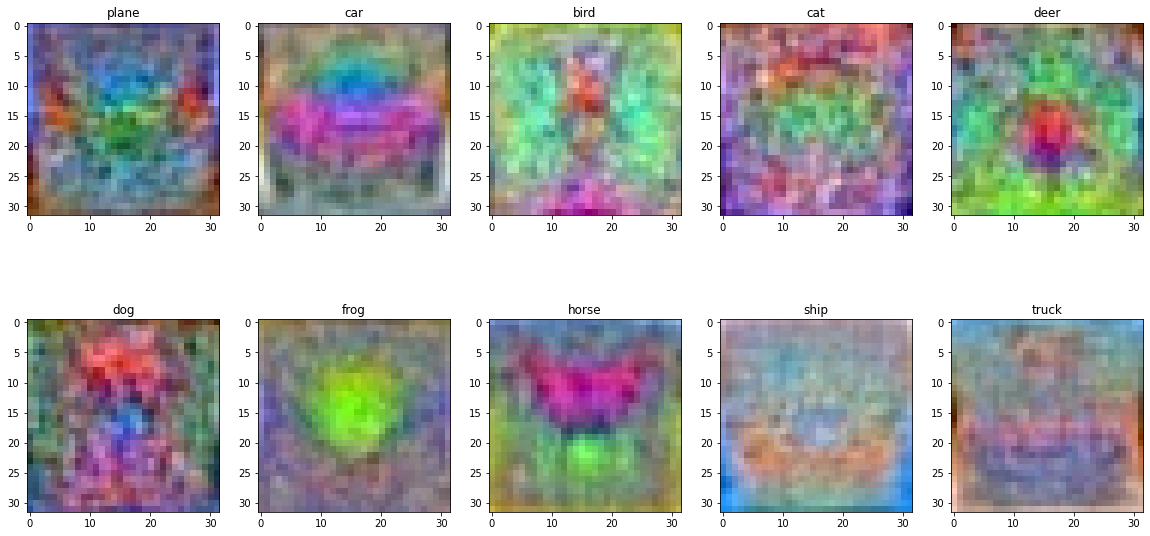

In [5]:
w_0_copy = w_0
w_0_copy = np.delete(w_0_copy,3072,axis=1)  #deleting the bias column 
img=[[],[],[],[],[],[],[],[],[],[]]
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(w_0.shape[0]):
    img_i = w_0_copy[i,:]
    img[i]= (255.0*(img_i-min(img_i))/(max(img_i)-min(img_i))).reshape(32,32,3)     #remap to image values so can be dispalyed
    img[i] = img[i].astype("uint8")                                                 #change data type
fig, axes =  plt.subplots(2,5,figsize=(20,10))
k =0
for i in range(2):
    for j in range(5):
        axes[i,j].imshow(img[k])
        axes[i,j].set_title(classes[k])
        k+=1
plt.show()


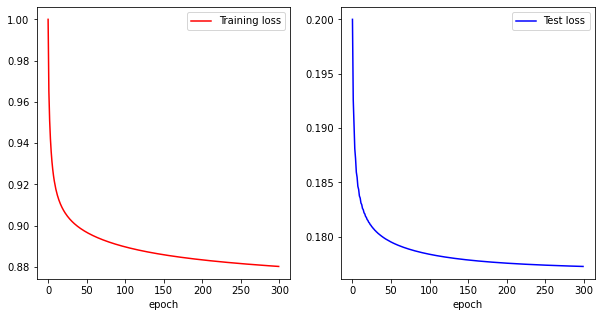

In [14]:
x_axis = np.arange(0,300,1)
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(x_axis,loss_history[0:],'r',label ='Training loss')
axes[1].plot(x_axis,val_loss_history[0:],'b',label ='Test loss')
axes[0].legend()
axes[1].legend()
axes[0].set_xlabel('epoch')
axes[1].set_xlabel('epoch')
plt.show()

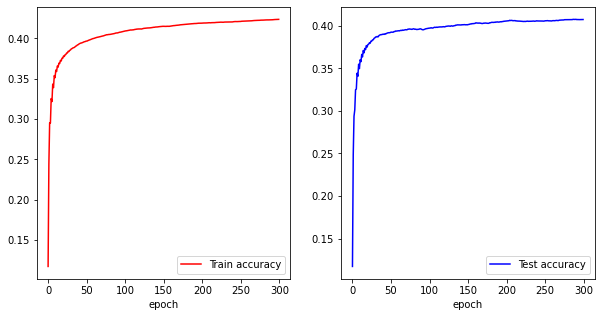

In [7]:
fig,axes1 = plt.subplots(1,2,figsize=(10,5))
axes1[0].plot(x_axis,train_acc_history,'r',label ='Train accuracy')
axes1[1].plot(x_axis,val_acc_history,'b',label ='Test accuracy')
axes1[0].legend()
axes1[1].legend()
axes1[0].set_xlabel('epoch')
axes1[1].set_xlabel('epoch')
plt.show()

#⌴Header 1
2 . fully connected 2 layer neural network
==========================================

In [2]:
def sigmoid(alpha):
    return 1/(1+np.exp(-alpha))
def accuracy(scores,ytrain):
    predclass = np.argmax(scores,axis=0)
    trueclass = np.argmax(ytrain,axis=0)
    return (np.sum(predclass==trueclass)/trueclass.size)


In [3]:
#using the previous loadded data set cifar10, reshaped, biasing added
#200 neurons,
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)                   #normalizing
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K).T
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K).T
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_train = np.insert(x_train,3072,np.zeros((50000,)),axis=1).T # add zeros to include the biasing trick 3073 x 50000
x_test = x_test.astype('float32')
x_test = np.insert(x_test,3072,np.zeros((10000,)),axis=1).T
std=1e-5
batchsize = 500
H =200                              #hidden nodes (neurons)
w_1 = std*np.random.randn(H, Din+1) # biasing trick 200x3073 matrix
w_2 = std*np.random.randn(K, H)     # 10x200 matrix
epochs = 300    
lr = 0.025    
lr_decay= 0.975
reg =  5e-5
loss_history2 = []
train_acc_history2 = []
val_acc_history2 = []
val_loss_history2 = []
seed = 0
rng = np.random.default_rng(seed=seed)
# create random batches per iteration
iteration =0
epoch =0

x_train:  (50000, 32, 32, 3)


In [4]:
t1 = time.time()
while epoch < epochs:
    # calculate P1s , send through activation function and get ys, calculate p2s using w_2, calculate loss, get gradient, do gradient descent
    indices = np.arange(Ntr)    #shuffling images each epoch
    rng.shuffle(indices)
    X = x_train[:,indices]
    Y_tr = y_train[:,indices]
    #calculate P1s
    P1 = w_1.dot(X)    #P1 200Xbatchsize
    y = sigmoid(P1)    #ys
    P2 = w_2.dot(y)    #P2, in this case outputs,no activation 10xbatchsize
    #explicit implementation of loss
    L = (1./Ntr)*((np.square(P2-Y_tr)).sum() + reg*(np.sum(w_1**2)+np.sum(w_2**2)))
    #explicit calculation of the two gradients 
    #PARTIAL DERIVATIVE WRT W2
    dL_dP2 = (1./Ntr)*2.0*(P2-Y_tr)
    dP2_dw2 = y.T
    dL_dw2 = dL_dP2.dot(dP2_dw2) + reg*w_2  #pfffttt 
    #PARTIAL DERIVATIVE WRT W1
    dP2_dy = w_2
    dy_dP1 = y*(1-y)
    dP1_dw1= X
    dL_dw1 = np.multiply(((dP2_dy.T).dot(dL_dP2)),dy_dP1).dot(dP1_dw1.T)  +reg*w_1    #aaaaaaaaaaaaaaa
    w_1 += -lr*dL_dw1
    w_2 += -lr*dL_dw2
    lr *= lr_decay
    loss_history2.append(L)
    train_acc_history2.append(accuracy(P2, Y_tr))
        
    #validation

    valP1 = w_1.dot(x_test)    
    val_y = sigmoid(valP1)    
    valP2 = w_2.dot(val_y)
    valL = (1./10000)*((np.square(valP2-y_test)).sum() + reg*(np.sum(w_1**2)+np.sum(w_2**2)))
    val_loss_history2.append(valL)
    val_acc_history2.append(accuracy(valP2, y_test))
        
    print('epoch:{}, loss: {}, train_acc: {}, validation_loss: {}, validation_acc: {}'.format(epoch,loss_history2[epoch],train_acc_history2[epoch],val_loss_history2[epoch],val_acc_history2[epoch]))
    epoch+=1
t2 = time.time()
print('Execution time : ',t2-t1)

cc: 0.25172, validation_loss: 0.8726063117727034, validation_acc: 0.2592
epoch:129, loss: 0.872428384972042, train_acc: 0.25176, validation_loss: 0.8725793047829262, validation_acc: 0.2593
epoch:130, loss: 0.8724010406802747, train_acc: 0.2518, validation_loss: 0.872553043147996, validation_acc: 0.2592
epoch:131, loss: 0.8723744489658494, train_acc: 0.2518, validation_loss: 0.8725275044813351, validation_acc: 0.2592
epoch:132, loss: 0.8723485871980458, train_acc: 0.2518, validation_loss: 0.8725026671708925, validation_acc: 0.2592
epoch:133, loss: 0.8723234335386149, train_acc: 0.2518, validation_loss: 0.8724785103468354, validation_acc: 0.2594
epoch:134, loss: 0.8722989669083133, train_acc: 0.2518, validation_loss: 0.8724550138507704, validation_acc: 0.2595
epoch:135, loss: 0.8722751669549538, train_acc: 0.2518, validation_loss: 0.8724321582064333, validation_acc: 0.2595
epoch:136, loss: 0.8722520140229173, train_acc: 0.25182, validation_loss: 0.8724099245917735, validation_acc: 0.2595

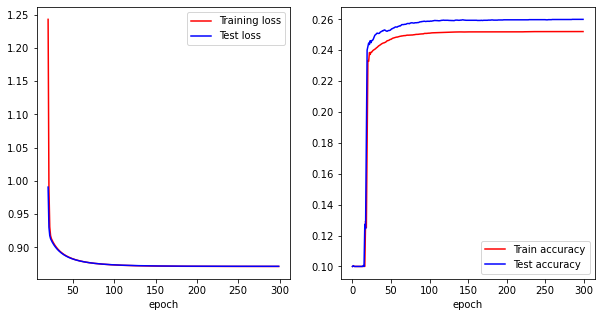

In [7]:
x_axis = np.arange(0,300,1)
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(x_axis[20:300],loss_history2[20:],'r',label ='Training loss')
axes[0].plot(x_axis[20:300],val_loss_history2[20:],'b',label ='Test loss')
axes[1].plot(x_axis,train_acc_history2,'r',label ='Train accuracy')
axes[1].plot(x_axis,val_acc_history2,'b',label ='Test accuracy')
axes[0].legend()
axes[1].legend()
axes[0].set_xlabel('epoch')
axes[1].set_xlabel('epoch')
plt.show()

#⌴Header 1
3 STOCHASTIC GRADIENT DESCENT
=============================

In [4]:
#using the previous loadded data set cifar10, reshaped, biasing added
#200 neurons,
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)                   #normalizing
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K).T
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K).T
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_train = np.insert(x_train,3072,np.zeros((50000,)),axis=1).T # add zeros to include the biasing trick 3073 x 50000
x_test = x_test.astype('float32')
x_test = np.insert(x_test,3072,np.zeros((10000,)),axis=1).T
std=1e-5
batchsize = 500
H =200                              #hidden nodes (neurons)
w_1 = std*np.random.randn(H, Din+1) # biasing trick 200x3073 matrix
w_2 = std*np.random.randn(K, H)     # 10x200 matrix
epochs = 300    
lr = 0.02    
lr_decay= 0.999
reg =  5e-5
loss_history = []
train_acc_history = []
val_acc_history = []
val_loss_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
# create random batches per iteration
iteration =0
epoch =0

x_train:  (50000, 32, 32, 3)


In [5]:
def sigmoid(alpha):
    return 1/(1+np.exp(-alpha))

def accuracy(scores,ytrain):
    predclass = np.argmax(scores,axis=0)
    trueclass = np.argmax(ytrain,axis=0)
    return (np.sum(predclass==trueclass)/trueclass.size)



In [6]:
t1 = time.time()
while epoch < epochs:
    while iteration <(Ntr/batchsize):
        #take a random batch, calculate P1s , send through activation function and get ys, calculate p2s using w_2, calculate loss, get gradient, do gradient descent
        # take a random batch,xtrain contains 3073x50000, need 3073xbatchsize by random
        indices = np.random.choice(Ntr,batchsize,replace=False) # random indices batchsize
        #indices = np.arange(Ntr)    #shuffling images each epoch
        #rng.shuffle(indices)
        X = x_train[:,indices]
        Y_tr = y_train[:,indices]
        #X = x_train[:,indices]
        #Y_tr = y_train[:,indices]
        #calculate P1s
        P1 = w_1.dot(X)    #P1 200Xbatchsize
        y = sigmoid(P1)    #ys
        P2 = w_2.dot(y)    #P2, in this case outputs,no activation 10xbatchsize
        #explicit implementation of loss
        L = (1./batchsize)*((np.square(P2-Y_tr)).sum() + reg*(np.sum(w_1**2)+np.sum(w_2**2)))
        #explicit calculation of the two gradients 
        #PARTIAL DERIVATIVE WRT W2
        dL_dP2 = (1./batchsize)*2.0*(P2-Y_tr)
        dP2_dw2 = y.T
        dL_dw2 = dL_dP2.dot(dP2_dw2) + reg*w_2  #pfffttt 
        #PARTIAL DERIVATIVE WRT W1
        dP2_dy = w_2
        dy_dP1 = y*(1-y)
        dP1_dw1= X
        dL_dw1 = np.multiply(((dP2_dy.T).dot(dL_dP2)),dy_dP1).dot(dP1_dw1.T)  +reg*w_1    #aaaaaaaaaaaaaaa

        w_1 += -lr*dL_dw1
        w_2 += -lr*dL_dw2
        iteration +=1
    lr *= lr_decay
    loss_history.append(L)
    train_acc_history.append(accuracy(P2, Y_tr))
        
    #validation

    valP1 = w_1.dot(x_test)    
    val_y = sigmoid(valP1)    
    valP2 = w_2.dot(val_y)
    valL = (1./10000)*((np.square(valP2-y_test)).sum() + reg*(np.sum(w_1**2)+np.sum(w_2**2)))
    val_loss_history.append(valL)
    val_acc_history.append(accuracy(valP2, y_test))
        
    print('epoch:{}, loss: {}, train_acc: {}, validation_loss: {}, validation_acc: {}'.format(epoch,loss_history[epoch],train_acc_history[epoch],val_loss_history[epoch],val_acc_history[epoch]))
    epoch+=1
    iteration =0
t2 = time.time()
print('Execution time : ',t2-t1)

poch:126, loss: 0.5529997076085466, train_acc: 0.718, validation_loss: 0.8834764807197175, validation_acc: 0.3909
epoch:127, loss: 0.540449672511266, train_acc: 0.74, validation_loss: 0.8805005994329278, validation_acc: 0.3923
epoch:128, loss: 0.5394528731406206, train_acc: 0.752, validation_loss: 0.8845525173226912, validation_acc: 0.3928
epoch:129, loss: 0.5515758119707501, train_acc: 0.71, validation_loss: 0.8840150750681329, validation_acc: 0.3896
epoch:130, loss: 0.559588892309398, train_acc: 0.732, validation_loss: 0.8903921131037742, validation_acc: 0.3899
epoch:131, loss: 0.5673144118234978, train_acc: 0.702, validation_loss: 0.8922561441892457, validation_acc: 0.3882
epoch:132, loss: 0.5757013607434596, train_acc: 0.698, validation_loss: 0.892230654941691, validation_acc: 0.3936
epoch:133, loss: 0.5522173104601165, train_acc: 0.724, validation_loss: 0.8836117212058162, validation_acc: 0.3866
epoch:134, loss: 0.5327294137149158, train_acc: 0.754, validation_loss: 0.889878653300

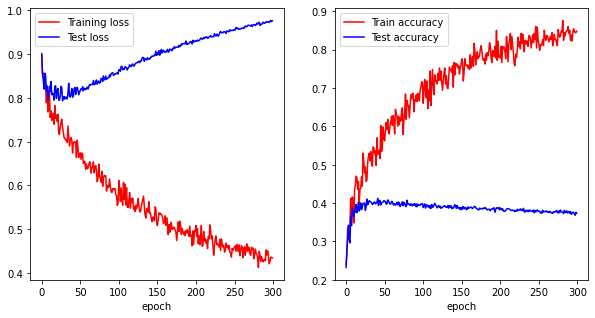

In [7]:
x_axis = np.arange(0,300,1)
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(x_axis,loss_history[0:],'r',label ='Training loss')
axes[0].plot(x_axis,val_loss_history[0:],'b',label ='Test loss')
axes[1].plot(x_axis,train_acc_history,'r',label ='Train accuracy')
axes[1].plot(x_axis,val_acc_history,'b',label ='Test accuracy')
axes[0].legend()
axes[1].legend()
axes[0].set_xlabel('epoch')
axes[1].set_xlabel('epoch')
plt.show()

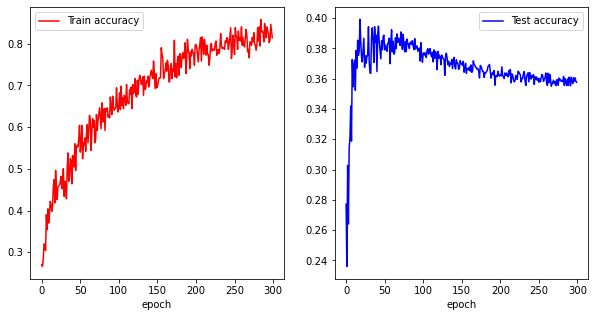

In [11]:
fig,axes1 = plt.subplots(1,2,figsize=(10,5))
axes1[0].plot(x_axis,train_acc_history,'r',label ='Train accuracy')
axes1[1].plot(x_axis,val_acc_history,'b',label ='Test accuracy')
axes1[0].legend()
axes1[1].legend()
axes1[0].set_xlabel('epoch')
axes1[1].set_xlabel('epoch')
plt.show()